# Imports and Settings

In [1]:
import numpy as np
import torch
import torch.nn as nn
from Code.Models.SchNet.schnet import SchNet
from Code.Train.trainer import Trainer
from Code.Tools.Network.lr_scheduler import AbcExponentialLR
import matplotlib
%matplotlib inline

In [2]:
debug = False
use_cuda = True

In [3]:
data_path_train = './Dataset/SchNet/iso17_train_X.npy'
label_path_train = './Dataset/SchNet/iso17_train_Y.npy'
data_path_within = './Dataset/SchNet/iso17_within_X.npy'
label_path_within = './Dataset/SchNet/iso17_within_Y.npy'
comment = 'SchNet_5_cutoff'
eval_path = './evaluation/SchNet'

# Load Data

In [4]:
X_train = np.load(data_path_train)
Y_train = np.load(label_path_train) * -1
X_within = np.load(data_path_within)
Y_within = np.load(label_path_within) * -1

In [5]:
X_train.shape

(404000, 19, 19)

In [6]:
if debug:
    n_data = 4000
    X_train = X_train[:n_data]
    Y_train = Y_train[:n_data]
    X_within = X_within[:n_data]
    Y_within = Y_within[:n_data]

# Initialize Network

In [7]:
optimizer = torch.optim.Adam
loss_fn = torch.nn.MSELoss
lr_scheduler = AbcExponentialLR
lr_schedule = (0.001, 0.96, 1)
schnet = SchNet()
trainer = Trainer(model=schnet, optimizer=optimizer, loss_fn=loss_fn, eval_path=eval_path,
                  comment=comment, lr_scheduler=lr_scheduler, abc_schedule=lr_schedule,
                  use_cuda=use_cuda, lr_step='s100000', single_test_batch=True)

In [8]:
trainer.create_dataloaders(X_train, Y_train, X_within, Y_within, 32, num_workers=2)

# Train

In [9]:
trainer.fit(300)

epoch: 1	progress: 0.0	time estimate: 2464.19	train loss: 0.013531	test loss: 0.000906
epoch: 2	progress: 0.01	time estimate: 2447.62	train loss: 0.001434	test loss: 0.001336
epoch: 3	progress: 0.01	time estimate: 2437.82	train loss: 0.000988	test loss: 0.000502
epoch: 4	progress: 0.01	time estimate: 2427.77	train loss: 0.000811	test loss: 0.001182
epoch: 5	progress: 0.02	time estimate: 2418.28	train loss: 0.00071	test loss: 0.000532
epoch: 6	progress: 0.02	time estimate: 2409.29	train loss: 0.000643	test loss: 0.000606
epoch: 7	progress: 0.02	time estimate: 2400.46	train loss: 0.000585	test loss: 0.000487
epoch: 8	progress: 0.03	time estimate: 2391.92	train loss: 0.000543	test loss: 0.000665
epoch: 9	progress: 0.03	time estimate: 2383.42	train loss: 0.000516	test loss: 0.000629
epoch: 10	progress: 0.03	time estimate: 2375.2	train loss: 0.000487	test loss: 0.000304
epoch: 11	progress: 0.04	time estimate: 2366.97	train loss: 0.000465	test loss: 0.00032
epoch: 12	progress: 0.04	time esti

epoch: 94	progress: 0.31	time estimate: 1689.15	train loss: 0.000175	test loss: 0.000182
epoch: 95	progress: 0.32	time estimate: 1680.96	train loss: 0.000174	test loss: 0.000169
epoch: 96	progress: 0.32	time estimate: 1672.91	train loss: 0.000174	test loss: 0.000173
epoch: 97	progress: 0.32	time estimate: 1664.75	train loss: 0.000174	test loss: 0.000174
epoch: 98	progress: 0.33	time estimate: 1656.57	train loss: 0.000173	test loss: 0.000169
epoch: 99	progress: 0.33	time estimate: 1648.42	train loss: 0.000173	test loss: 0.000162
epoch: 100	progress: 0.33	time estimate: 1640.24	train loss: 0.000173	test loss: 0.000174
epoch: 101	progress: 0.34	time estimate: 1632.06	train loss: 0.000172	test loss: 0.000176
epoch: 102	progress: 0.34	time estimate: 1623.86	train loss: 0.000172	test loss: 0.000169
epoch: 103	progress: 0.34	time estimate: 1615.66	train loss: 0.000171	test loss: 0.000171
epoch: 104	progress: 0.35	time estimate: 1607.48	train loss: 0.000171	test loss: 0.000168
epoch: 105	progr

Process Process-718:
Process Process-717:


KeyboardInterrupt: 

Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stfn/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/home/stfn/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(tim

# Evaluate

In [10]:
trainer.calculate_mae()

0.07458171248435974

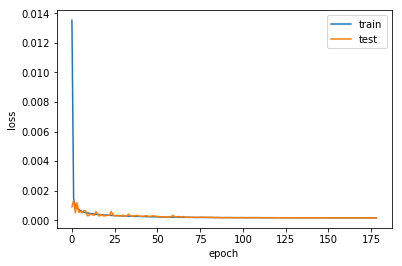

In [11]:
trainer.create_loss_plot()

In [12]:
trainer.show_loss_plot()

/home/stfn/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [13]:
trainer.save_loss_plot()